# 🫧 기술통계
## - 데이터 표본의 특징을 나타내는 요약된 정보.

## ✔ describe() : 기술통계 정보를 하나의 테이블로 제공하는 함수 -> include/exclude 활용
- 결측값을 제외한 데이터 분포의 중심 경향, 분산, 차원의 모양을 요약하는 통계 포함됨
- 숫자 또는 오브젝트 데이터 타입인 변수의 집합에 관해서도 분석 가능

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#시본에서 제공하는 펭귄 데이터셋 로드
#수치형 변수 관련 정보만 출력

df = sns.load_dataset('penguins') 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
#수치형 변수 뿐만 아니라 모든 변수를 포함한 정보 출력

df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
#오브젝트 타입만 확인 -> 테이블 인덱스에 데이터 수(count), 고윳값 수(unique), 가장 많이 출연하는 값(top), 빈도(freq)

df.describe(include=[object])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [6]:
#숫자 데이터 타입만 출력

df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
#카테고리 데이터 타입 제외하고 출력

df.describe(exclude=['category'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## ✔ percentile() : 넘파이로 백분위수 구하는 함수

- 데이터에 결측값이 있다면 에러가 발생할 수 있음

In [10]:
df = df.fillna(0) #에러방지 결측값 0으로
point_5 = np.percentile(df['bill_depth_mm'], q=[0, 25, 50, 75, 100])
point_5

array([ 0. , 15.5, 17.3, 18.7, 21.5])

In [12]:
#개별적인 원소에 접근

print(point_5[0])
print(point_5[2])
print(point_5[4])

0.0
17.3
21.5


## ✔ quantile() : 판다스로 백분위수 구하는 함수

- 함수의 ()에 리스트로 원하는 백분위수를 소수점으로 입력하면 해당 값 출력
- 하나의 백분위수도 입력 가능

In [13]:
df.quantile([0, .25, .5, .75, 1.0])

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\1305298843.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0, .25, .5, .75, 1.0])


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0.00,0.00,0.0,0.0,0.0
0.25,39.20,15.5,190.0,3550.0
0.50,44.25,17.3,197.0,4025.0
0.75,48.50,18.7,213.0,4750.0
1.00,59.60,21.5,231.0,6300.0


In [14]:
df.quantile(0.25)

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\3656653379.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)


bill_length_mm         39.2
bill_depth_mm          15.5
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [15]:
df['bill_length_mm'].quantile(.25)

39.2

## count() : 데이터 수 파악하기
- 컬럼이나 로우를 기준으로 결측값이 아닌 모든 데이터의 셀 수를 계산.
- None, NaN, NaT, numpy.inf 값 등이 결측값으로 인지됨

In [16]:
df.count() #결측값을 0으로 바꿔서 모든 데이터 344개로 나옴

species              344
island               344
bill_length_mm       344
bill_depth_mm        344
flipper_length_mm    344
body_mass_g          344
sex                  344
dtype: int64

In [17]:
df = sns.load_dataset('penguins') 
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [18]:
df['bill_depth_mm'].count()

342

In [19]:
df.count(axis='columns') #개별 행에 포함된 컬럼 수

0      7
1      7
2      7
3      2
4      7
      ..
339    2
340    7
341    7
342    7
343    7
Length: 344, dtype: int64

## max() : 최댓값 찾기
- 해당 데이터의 기준 축에서 가장 큰 값 출력

In [20]:
df.max()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\1151452817.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
dtype: object

In [21]:
df['bill_length_mm'].max()

59.6

## min() : 최솟값 찾기
- 해당 데이터의 기준 축에서 가장 작은 값 출력
- 오브젝트 타입의 경우 빈도가 가장 낮은 값 출력

In [22]:
df.min()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\3962516015.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: object

In [24]:
df['bill_depth_mm'].idxmin() #최솟값이 있는 인덱스 찾기

244

## mean() : 평균값 찾기
- 숫자 타입 컬럼의 평균값만 계산

In [25]:
df.mean()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

## std() : 표준편차 찾기
- 기본적으로 N-1로 정규화

In [26]:
df.std()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64

## sum() : 데이터 합계 구하기
- 문잣값의 경우 문자가 합쳐져서 출력

In [27]:
df.sum()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\1703867807.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum()


species              AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdel...
island               TorgersenTorgersenTorgersenTorgersenTorgersenT...
bill_length_mm                                                 15021.3
bill_depth_mm                                                   5865.7
flipper_length_mm                                              68713.0
body_mass_g                                                  1437000.0
dtype: object

## 기술통계 시각화 - 막대그래프, 히스토그램, 박스플롯

## 막대그래프

### catplot() : 시본에서 합계를 표현하는 막대그래프

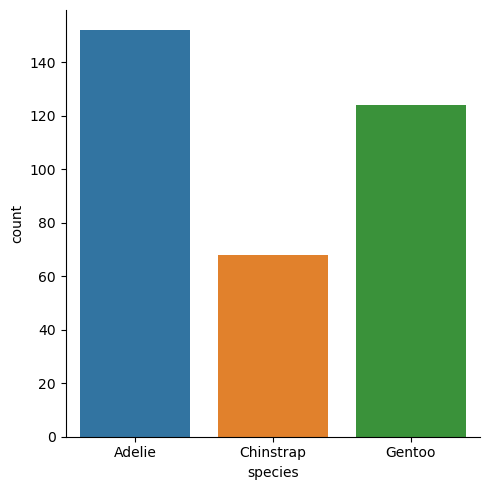

In [38]:
#오브젝트 타입이 species / island 2개

sns.catplot(data=df, x="species", kind="count")

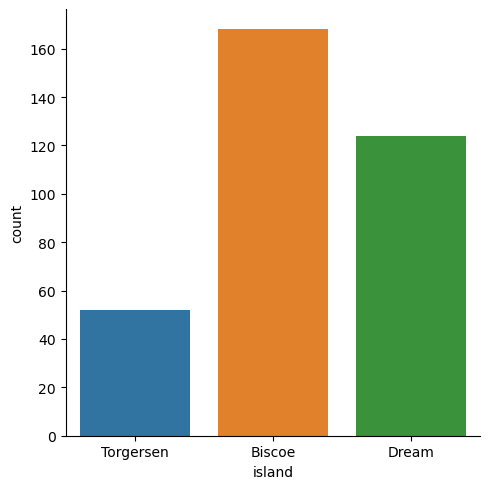

In [39]:
sns.catplot(data=df, x="island", kind="count")

### barplot() : 시본에서 평균이나 계산한 결과를 표현하는 막대그래프
- y축에 숫자 타입 변수 지정

<Axes: xlabel='species', ylabel='bill_length_mm'>

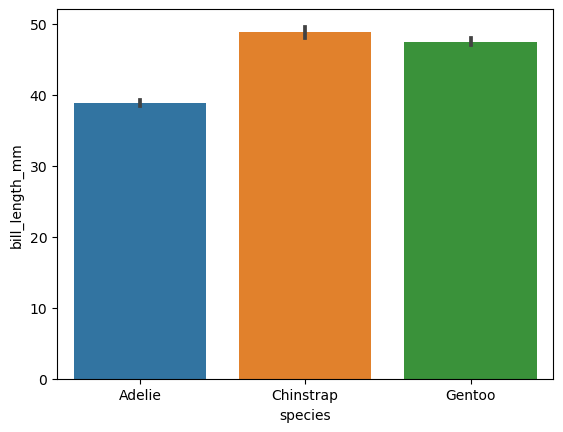

In [36]:
sns.barplot(data=df, x="species", y="bill_length_mm")

<Axes: xlabel='island', ylabel='bill_length_mm'>

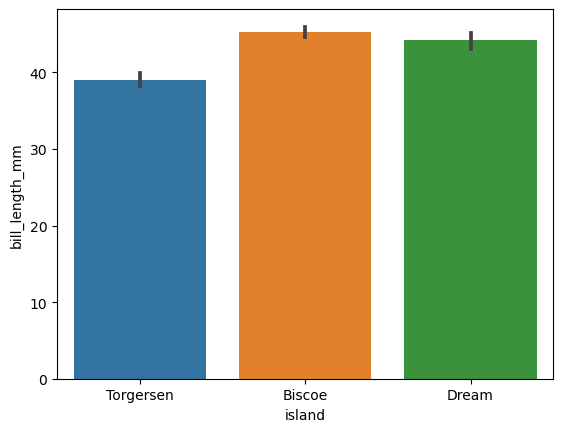

In [37]:
sns.barplot(data=df, x="island", y="bill_length_mm")

## 히스토그램

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

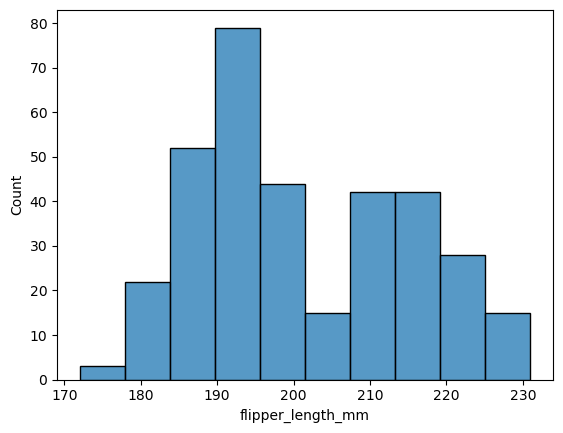

In [42]:
sns.histplot(data=df, x="flipper_length_mm")

<Axes: xlabel='body_mass_g', ylabel='Count'>

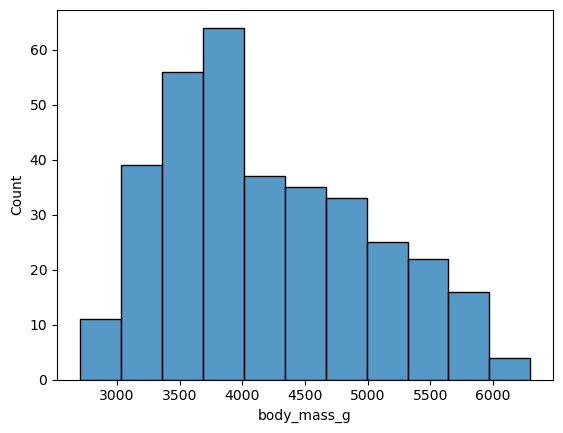

In [43]:
sns.histplot(data=df, x="body_mass_g")

## 박스플롯
- 변수의 분포를 표시
- 숫자와 오브젝트 타입 모두 가능
- 변수 간 수준 쉽게 비교 가능

<Axes: >

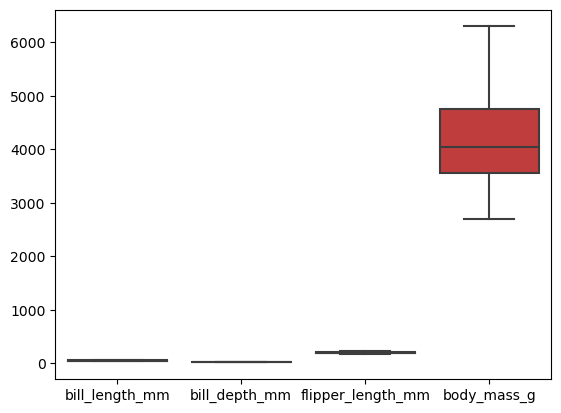

In [44]:
sns.boxplot(data=df)

<Axes: xlabel='species', ylabel='body_mass_g'>

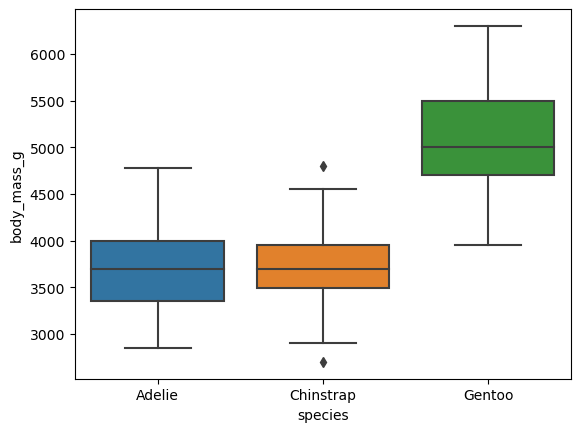

In [46]:
sns.boxplot(data=df, x = "species", y="body_mass_g")

# ---------------------------------------------------------------------------------------------------------------
# 🫧 고윳값 확인 : unique()
- 넘파이 배열 형식으로 반환.
- 숫자 타입과 오브젝트 타입 모두 사용 가능. 주로 오브젝트에서 사용

In [49]:
df['species'].unique() #species 컬럼의 고윳값 확인

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [50]:
df['bill_depth_mm'].unique() #숫자 타입 컬럼의 고윳값 확인 -> 큰 의미가 없어서 잘 사용하지 않음

array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2,
       18.9, 18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8,
       17.7, 19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. ,
       16.5, 20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3,
       14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1,
       14.3, 15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8,
       14.9, 15.6, 14. , 14.7])

## value_counts() : 고윳값과 해당 개수 동시 확인
- 시리즈와 데이터프레임 모두 사용할 수 있음

In [54]:
df['species'].value_counts() #시리즈에 적용

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [55]:
df['species'].value_counts(normalize=True) #비중으로 확인

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

### bins : 고윳값 세는 대신 전체 데이터를 지정한 수 기준으로 인덱스를 나누어 계산
#### bins를 3개와 5개로 나누어 어느 구간에 데이터가 밀집해 있는지 어느 구간에 어느 정도의 데이터가 존재하는지 정확하게 수치로 구할 수 있음

In [57]:
df['bill_depth_mm'].value_counts(bins=5)

(16.46, 18.14]                 99
(18.14, 19.82]                 95
(14.78, 16.46]                 66
(13.091000000000001, 14.78]    56
(19.82, 21.5]                  26
Name: bill_depth_mm, dtype: int64

In [58]:
df['bill_depth_mm'].value_counts(bins=3)

(15.9, 18.7]                  158
(13.091000000000001, 15.9]    103
(18.7, 21.5]                   81
Name: bill_depth_mm, dtype: int64

In [60]:
df.value_counts(dropna=False) #결측값도 포함해서 고윳값 확인 

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       Female    1
Gentoo   Biscoe     42.9            13.1           215.0              5000.0       Female    1
                    43.8            13.9           208.0              4300.0       Female    1
                    43.6            13.9           217.0              4900.0       Female    1
                    43.5            15.2           213.0              4650.0       Female    1
                                                                                            ..
Adelie   Torgersen  36.7            18.8           187.0              3800.0       Female    1
                    36.6            17.8           185.0              3700.0       Female    1
                    36.2            17.2           187.0              3150.0       Female    1
                                    16.1           187.

In [56]:
df.value_counts() #데이터 프레임에 적용

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       Female    1
Gentoo   Biscoe     44.0            13.6           208.0              4350.0       Female    1
                    43.6            13.9           217.0              4900.0       Female    1
                    43.5            15.2           213.0              4650.0       Female    1
                                    14.2           220.0              4700.0       Female    1
                                                                                            ..
Adelie   Torgersen  36.6            17.8           185.0              3700.0       Female    1
                    36.2            17.2           187.0              3150.0       Female    1
                                    16.1           187.0              3550.0       Female    1
                    35.9            16.6           190.

# ---------------------------------------------------------------------------------------------------------------
# 🫧 현재 컬럼 목록 확인

## columns : 데이터셋의 전체 컬럼명 확인 

In [61]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## 컬럼 호출 / 2개 이상의 컬럼 조합해서 데이터프레임 생성

In [62]:
df['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [65]:
df.species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [64]:
df[['species', 'bill_depth_mm']]

,species,bill_depth_mm
0,Adelie,18.7
1,Adelie,17.4
2,Adelie,18.0
3,Adelie,NaN
4,Adelie,19.3
...,...,...
339,Gentoo,NaN
340,Gentoo,14.3
341,Gentoo,15.7
342,Gentoo,14.8


In [66]:
cols=['species', 'bill_depth_mm']
df[cols]

,species,bill_depth_mm
0,Adelie,18.7
1,Adelie,17.4
2,Adelie,18.0
3,Adelie,NaN
4,Adelie,19.3
...,...,...
339,Gentoo,NaN
340,Gentoo,14.3
341,Gentoo,15.7
342,Gentoo,14.8


In [67]:
new_df = df[cols]
new_df

,species,bill_depth_mm
0,Adelie,18.7
1,Adelie,17.4
2,Adelie,18.0
3,Adelie,NaN
4,Adelie,19.3
...,...,...
339,Gentoo,NaN
340,Gentoo,14.3
341,Gentoo,15.7
342,Gentoo,14.8


## 새로운 컬럼 생성

### 단일 컬럼 생성하기 : df['생성할 컬럼명']

In [68]:
df['bill_depth_cm'] = df['bill_depth_mm'] / 10
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93


### 다중 컬럼 동시에 생성하기 : assign()

In [69]:
df.assign(
    bill_length_cm = df['bill_length_mm'] / 10
    ,bill_depth_cm = df['bill_depth_mm'] / 10
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm,bill_length_cm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87,3.91
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74,3.95
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80,4.03
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93,3.67
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1.43,4.68
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.57,5.04
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1.48,4.52


## 동일한 데이터 타입의 컬럼만 선택하기 : select_dtypes()

In [71]:
df.select_dtypes(include=['float64']).columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'bill_depth_cm'],
      dtype='object')

In [72]:
df.select_dtypes(include=['object']).columns #string 속성을 지원하지 않으므로 object로 입력

Index(['species', 'island', 'sex'], dtype='object')

In [74]:
df.select_dtypes(exclude=['object']).columns #특정 dtype만 제외

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'bill_depth_cm'],
      dtype='object')

## 컬럼과 로우 삭제하기 : drop()
- 불필요한 컬럼이나 로우 삭제
- axis : 세로 1

In [75]:
df.drop('species', axis=1).head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
0,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87
1,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
2,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80
3,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93


In [76]:
df.drop(['species', 'flipper_length_mm'], axis=1).head()

,island,bill_length_mm,bill_depth_mm,body_mass_g,sex,bill_depth_cm
0,Torgersen,39.1,18.7,3750.0,Male,1.87
1,Torgersen,39.5,17.4,3800.0,Female,1.74
2,Torgersen,40.3,18.0,3250.0,Female,1.80
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,3450.0,Female,1.93


In [77]:
df.drop([0, 3, 5], axis=0).head() #특정 인덱스의 로우 삭제

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,1.78
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,1.96


In [81]:
df.drop([2]).head() #axis 생략 가능

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,2.06


## 컬럼 이름 변경하기

In [82]:
df.rename(columns={'species':'펭귄종류', 'island':'서식하는 섬', 'bill_length_mm':'부리 길이'}).head()

,펭귄종류,서식하는 섬,부리 길이,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93


In [84]:
df.columns = ['펭귄 종류', '서식하는 섬', '부리 길이', '부리 깊이', '지느러미 길이', '몸무게', '성별', '부리 깊이(cm)']
df.head()

,펭귄 종류,서식하는 섬,부리 길이,부리 깊이,지느러미 길이,몸무게,성별,부리 깊이(cm)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.87
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.74
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.80
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.93


## 컬럼 순서/위치 변경하기

In [88]:
#컬럼명을 원하는 순서대로 재입력하면 컬럼 순서 변경 가능

df = sns.load_dataset('penguins')
df = df[['species', 'island', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,Male,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,Female,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,Female,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,Female,36.7,19.3,193.0,3450.0


In [89]:
#columns 함수 사용하여 순서 지정
#첫번째 컬럼 기준 0

df.columns = df.columns[[0, 1, 6, 2, 3, 4, 5]]
df.head()

,species,island,body_mass_g,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,Male,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,Female,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,Female,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,Female,36.7,19.3,193.0,3450.0


In [90]:
#for문과 if문을 사용해서 일부 컬럼 이동하기

colsToStay = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
cols = colsToStay + [col for col in df if col not in colsToStay]
df = df[cols]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,body_mass_g,sex
0,18.7,181.0,3750.0,Adelie,Torgersen,Male,39.1
1,17.4,186.0,3800.0,Adelie,Torgersen,Female,39.5
2,18.0,195.0,3250.0,Adelie,Torgersen,Female,40.3
3,NaN,NaN,NaN,Adelie,Torgersen,NaN,NaN
4,19.3,193.0,3450.0,Adelie,Torgersen,Female,36.7


## 컬럼과 인덱스 교환 : transpose()

In [94]:
df[:11].transpose()

,0,1,2,3,4,5,6,7,8,9,10
bill_length_mm,18.7,17.4,18.0,NaN,19.3,20.6,17.8,19.6,18.1,20.2,17.1
bill_depth_mm,181.0,186.0,195.0,NaN,193.0,190.0,181.0,195.0,193.0,190.0,186.0
flipper_length_mm,3750.0,3800.0,3250.0,NaN,3450.0,3650.0,3625.0,4675.0,3475.0,4250.0,3300.0
species,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie
island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen
body_mass_g,Male,Female,Female,NaN,Female,Male,Female,Male,NaN,NaN,NaN
sex,39.1,39.5,40.3,NaN,36.7,39.3,38.9,39.2,34.1,42.0,37.8


In [93]:
df[:11].T

,0,1,2,3,4,5,6,7,8,9,10
bill_length_mm,18.7,17.4,18.0,NaN,19.3,20.6,17.8,19.6,18.1,20.2,17.1
bill_depth_mm,181.0,186.0,195.0,NaN,193.0,190.0,181.0,195.0,193.0,190.0,186.0
flipper_length_mm,3750.0,3800.0,3250.0,NaN,3450.0,3650.0,3625.0,4675.0,3475.0,4250.0,3300.0
species,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie
island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen
body_mass_g,Male,Female,Female,NaN,Female,Male,Female,Male,NaN,NaN,NaN
sex,39.1,39.5,40.3,NaN,36.7,39.3,38.9,39.2,34.1,42.0,37.8


# ---------------------------------------------------------------------------------------------------------------
# 🫧 데이터 인덱싱 

## 문자형 인덱스 인덱싱하기

In [95]:
df = sns.load_dataset('penguins')
df = df[:11].transpose()
df

,0,1,2,3,4,5,6,7,8,9,10
species,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie,Adelie
island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen
bill_length_mm,39.1,39.5,40.3,NaN,36.7,39.3,38.9,39.2,34.1,42.0,37.8
bill_depth_mm,18.7,17.4,18.0,NaN,19.3,20.6,17.8,19.6,18.1,20.2,17.1
flipper_length_mm,181.0,186.0,195.0,NaN,193.0,190.0,181.0,195.0,193.0,190.0,186.0
body_mass_g,3750.0,3800.0,3250.0,NaN,3450.0,3650.0,3625.0,4675.0,3475.0,4250.0,3300.0
sex,Male,Female,Female,NaN,Female,Male,Female,Male,NaN,NaN,NaN


In [96]:
#하나의 문자형 인덱스에 접근하기 
#loc['인덱스명']

df.loc['bill_length_mm']

0     39.1
1     39.5
2     40.3
3      NaN
4     36.7
5     39.3
6     38.9
7     39.2
8     34.1
9     42.0
10    37.8
Name: bill_length_mm, dtype: object

In [97]:
#2개 이상의 문자형 인덱스 접근하기
#loc[['인덱스명', '인덱스명'...]]

df.loc[['bill_length_mm', 'sex']]

,0,1,2,3,4,5,6,7,8,9,10
bill_length_mm,39.1,39.5,40.3,NaN,36.7,39.3,38.9,39.2,34.1,42.0,37.8
sex,Male,Female,Female,NaN,Female,Male,Female,Male,NaN,NaN,NaN


In [98]:
#인덱스와 컬럼의 위치 지정하여 데이터 찾기

df.loc['bill_length_mm', 5]

39.3

In [99]:
#라벨 인덱스의 연속된 구간에 해당하는 복수의 인덱스 선택

df.loc['island':'bill_depth_mm', 7]

island            Torgersen
bill_length_mm         39.2
bill_depth_mm          19.6
Name: 7, dtype: object

In [100]:
#연속되지 않고 개별 라벨 인덱스 호출

df.loc[['island', 'bill_depth_mm', 'sex'], 7]

island           Torgersen
bill_depth_mm         19.6
sex                   Male
Name: 7, dtype: object

### 컬럼 기준으로 인덱싱

In [101]:
df = df.T

In [102]:
#특정 수치를 기준으로 인덱싱

df.loc[df['bill_length_mm'] > 40]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [103]:
df.loc[df['bill_length_mm'] > 40, ['sex']] #특정 컬럼에 해당하는 값만 확인

,sex
2,Female
9,NaN


In [104]:
df.loc[df['flipper_length_mm'] == 181]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female


In [105]:
df.loc[df['sex'] == 'Male']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male


### 값 변경하기
- 기존 값이 존재하면 변경되고, 기존 값이 없으면 새로운 값 저장됨

In [106]:
df.loc[[1, 3], ['bill_length_mm']] = 50
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,50,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [107]:
#인덱스 전체를 기준으로 특정 컬럼에 해당하는 값만 새롭게 저장하기

df.loc[:, 'bill_length_mm'] = 10
df.head()

C:\Users\serye\AppData\Local\Temp\ipykernel_3636\2767442697.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'bill_length_mm'] = 10


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,10,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,10,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,10,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,10,19.3,193.0,3450.0,Female


In [108]:
#190을 초과하는 값을 0으로 변경하기

df.loc[df['flipper_length_mm'] > 190] = 0
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,10,17.4,186.0,3800.0,Female
2,0,0,0,0,0,0,0
3,Adelie,Torgersen,10,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0


## 위치 기반 인덱싱하기

In [109]:
df = sns.load_dataset('penguins')

In [111]:
df.loc[[0]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [110]:
df.iloc[[0, 2]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [112]:
df.loc[:3]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [113]:
df.iloc[0, 1] #x:0, y:1 위치의 데이터

'Torgersen'

In [114]:
df.iloc[[1, 2], [2, 3]] #x:1~2, y:2~3 위치의 데이터

,bill_length_mm,bill_depth_mm
1,39.5,17.4
2,40.3,18.0


In [115]:
df.iloc[1:3, 0:3]

,species,island,bill_length_mm
1,Adelie,Torgersen,39.5
2,Adelie,Torgersen,40.3


# 컬럼을 인덱스로 만들기, 재정의 하기

### 특정 컬럼 값으로 인덱스 만들기 : set_index()

In [116]:
df.set_index('species', inplace=True)
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...
Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


### 컬럼을 잘못 지정하여 되돌려야 하는 경우 : reset_index()

In [117]:
df.reset_index()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
